<a href="https://colab.research.google.com/github/AstrophyJimmy/Numerical_Methods_for_ODEs/blob/main/Comparison_of_Numerical_Methods_for_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of Numerical Methods for Differential Equations
## Numerical Solutions presented are
*   Euler's Method
*   Heun's Method
*   Rung-Kutta Method of 4th Order

For the Differential Equation:
> $$\dfrac{dy(t)}{dt}=-y(t)t+\dfrac{\cos{2t}}{t}$$

With Analytical Solution:
> $$y(t)=\dfrac{\sin{t}\cos{t}}{t}$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos
from scipy import optimize 

In [ ]:
def f(t,y):
    return -y/t + cos(2*t)/t
t_i = 0 #Already implied in the vector t construction, will be used as 1e-100 to exclude the blow-up of the funtion at the origin
y_i = 1 #Will be inserted to be used through the propagation

def tRange(N):
  return np.linspace(1e-100,5,N)

def AnalSol(t):
  return sin(t)*cos(t)/t

def euler(un,tn,h,f):
  return un+h*f(tn, un)

def heun(un,tn,h,f):
  return un + h/2*(f(tn,un)+f(tn+h, un+h*f(tn,un)))

def RK4(un,tn,h,f):
  k1=f(tn,un)
  k2=f(tn+.5*h,un+.5*h*k1)
  k3=f(tn+.5*h,un+.5*h*k2)
  k4=f(tn+h,un+h*k3)
  k=(1/6)*(k1+2*k2+2*k3+k4)
  return un+h*k

#Euler Forward Method

N = np.array([5, 10, 15, 20, 25])+1
t_smooth = np.arange(1e-100,5.01,0.1)
y_Analytical = AnalSol(t_smooth) 

y_EulerAll = []
y_HeunAll = []
y_RK4All = []

for i in range(5):
  t = tRange(N[i])
  h  = t[1] #given that t[0]=0
  y_Euler = [y_i]
  y_Heun = [y_i]
  y_RK4 = [y_i]
  for j in range(0,len(t)-1):
    y_Euler.append(euler(y_Euler[j], t[j], h, f))
    y_Heun.append(heun(y_Heun[j], t[j], h, f))
    y_RK4.append(RK4(y_RK4[j], t[j], h, f))
  y_EulerAll.append(y_Euler)
  y_HeunAll.append(y_Heun)
  y_RK4All.append(y_RK4)

In [ ]:
#Error Analysis
testN = np.arange(2,303,20)+1
EulerError = np.zeros_like(testN,dtype=float)
HeunError = np.zeros_like(testN,dtype=float)
RK4Error = np.zeros_like(testN,dtype=float)
for i in range(len(testN)):
  t = tRange(testN[i])
  h  = t[1] #given that t[0]=0
  y_Euler = [y_i]
  y_Heun = [y_i]
  y_RK4 = [y_i]
  for j in range(0,len(t)-1):
    y_Euler.append(euler(y_Euler[j], t[j], h, f))
    y_Heun.append(heun(y_Heun[j], t[j], h, f))
    y_RK4.append(RK4(y_RK4[j], t[j], h, f))
  EulerError[i] = np.absolute(y_Euler[-1] - y_Analytical[-1])  
  HeunError[i] = np.absolute(y_Heun[-1] - y_Analytical[-1])
  RK4Error[i] = np.absolute(y_RK4[-1] - y_Analytical[-1])

def linearFit(x,a,b): #To fit the error trend 
  return a*x+b
testN1 = testN-1
logTestN = np.log(testN1)

Convergence order is: 
	For Euler fw. Method, it is 1
	For Heun Method, it is 2
	For RK-4 Method, it is 4


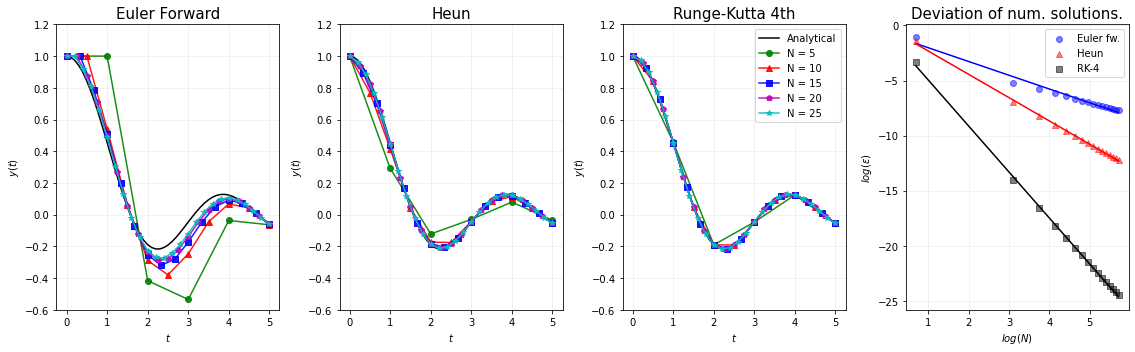

In [ ]:
#plotting
fig = plt.figure(figsize=(16,5))
methods = [y_EulerAll, y_HeunAll, y_RK4All]
titles = ['Euler Forward', 'Heun', 'Runge-Kutta 4th', 'Deviation of num. solutions.']
colors = ['g','r','b','m','c']
markers = ['-o','-^','-s','-p','-*']
for i in range(3):
  plt.subplot(1,4,i+1)
  y = methods[i]
  plt.plot(t_smooth, y_Analytical, label = 'Analytical', c='k')
  for j in range(5):
    plt.plot(tRange(N[j]),methods[i][j], markers[j],c=colors[j],label = 'N = '+str(N[j]-1),alpha=0.9)
  plt.grid(alpha=0.2)
  plt.title(titles[i],fontsize = 15)
  plt.ylabel(r'$y(t)$')
  plt.xlabel(r'$t$')
  plt.ylim(-0.6,1.2)
plt.legend()
 
logErrors = np.log(np.array([EulerError, HeunError, RK4Error]))
# logEuErr = np.logspace(EulerError[0],EulerError[-1], len(EulerError))
# logHeErr = np.logspace(HeunError[0], HeunError[-1], len(HeunError))
# logRKErr = np.logspace(RK4Error[0], RK4Error[-1], len(RK4Error))
# logErrors = np.array([logEuErr, logHeErr, logRKErr])
labelsErrors = ['Euler fw.', 'Heun', 'RK-4']
colorsErrors = ['b','r','k']

plt.subplot(1,4,4)
plt.title(titles[3],fontsize = 15)
plt.ylabel(r'$log(\epsilon)$')
plt.xlabel(r'$log(N)$')
convergenceOrder = []
print('Convergence order is: ')
for i in range(3):
  plt.scatter(logTestN,logErrors[i], marker = markers[i].replace('-',''), c= colorsErrors[i], label = labelsErrors[i],alpha=0.5)
  popt, pcov = optimize.curve_fit(linearFit, logTestN, logErrors[i])
  print('\tFor ' + labelsErrors[i] +' Method, it is ' + str(np.abs(np.int(popt[0])))) #Using the slope of the fit
  plt.plot(logTestN, linearFit(logTestN, *popt),c= colorsErrors[i])
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()